# Introduction to Statistics in Python

---

## Importing Libraies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics

## Loading Datasets

In [3]:
amir_deals = pd.read_csv('D:/git_repositories/Datacamp-Introduction_to_Statistics_in_Python/Data/amir_deals.csv', index_col = 0)
food_consumption = pd.read_csv('D:/git_repositories/Datacamp-Introduction_to_Statistics_in_Python/Data/food_consumption.csv', index_col = 0)
world_happiness = pd.read_csv('D:/git_repositories/Datacamp-Introduction_to_Statistics_in_Python/Data/world_happiness.csv', index_col = 0)

In [19]:
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


---

### Mean and Median

In [22]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

42.13272727272727
12.59
44.650000000000006
14.58


In [24]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

In [25]:
# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


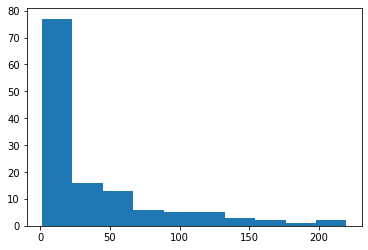

In [26]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(
    rice_consumption['co2_emission']
)
plt.show()

In [27]:
# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


### Measures of Spread

In [3]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [4]:
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [4]:
world_happiness.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


---

**Calculate the quartiles of the co2_emission column of food_consumption.**

In [6]:
# Calculating Quartiles
first_quartile = np.quantile(food_consumption['co2_emission'], 0.25)
print(first_quartile)

5.21


In [7]:
# Also known as median
second_quartile = np.quantile(food_consumption['co2_emission'], 0.50)
print(second_quartile)

16.53


In [8]:
# 3rd Quartile | quantile
third_quartile = np.quantile(food_consumption['co2_emission'], 0.75)
print(third_quartile)

62.597500000000004


In [9]:
# Calculating all together using np.linspace(start, end, num) function

quartiles = np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 5))
print(quartiles)

[   0.        5.21     16.53     62.5975 1712.    ]


**Calculate the variance and standard deviation of co2_emission for each food_category by grouping and aggregating.**

In [11]:
calculation_var_std_each_food = food_consumption.groupby('food_category') ['co2_emission'].agg([np.var, np.std])
print(np.round(calculation_var_std_each_food, 4))

                      var       std
food_category                      
beef           88748.4081  297.9067
dairy          17671.8920  132.9357
eggs              21.3718    4.6230
fish             921.6373   30.3585
lamb_goat      16475.5184  128.3570
nuts              35.6397    5.9699
pork            3094.9635   55.6324
poultry          245.0268   15.6533
rice            2281.3762   47.7638
soybeans           0.8799    0.9380
wheat             71.0239    8.4276


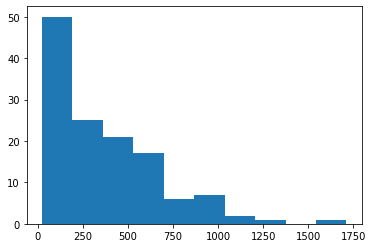

In [12]:
# Create histogram of co2_emission for food_category 'beef'
filtering_beef = food_consumption[food_consumption['food_category'] == 'beef']
plt.hist(filtering_beef['co2_emission'])
# Show plot
plt.show()

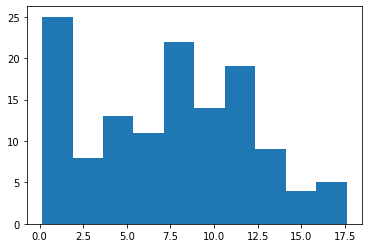

In [13]:
# Create histogram of co2_emission for food_category 'eggs'
filtering_eggs = food_consumption[food_consumption['food_category'] == 'eggs']
plt.hist(filtering_eggs['co2_emission'])
# Show plot
plt.show()

#### Finding Outliers using IQR

In [14]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than **Q1 - 1.5 X IQR**  or greater than **Q3 + 1.5 X IQR** , it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.

In [15]:
# Calculate the lower and upper cutoffs for outliers
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)

In [16]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
